In [1]:
from collections import Counter, defaultdict
import csv
import operator
import re

from matplotlib import pyplot as plt
import numpy as np

from IPython.core.display import display, HTML

%matplotlib inline

In [2]:
c = Counter()
d = defaultdict(list)

# this is an export of all tweets of my newsafaribooks bot: https://twitter.com/newsafaribooks

with open('tweets.csv') as f:
    for line in csv.DictReader(f):

        if bool(line['retweeted_status_id']) or bool(line['in_reply_to_user_id']):
            continue

        month = line['timestamp'][:7]
        
        if 'python' in line['text'].lower():
            c[month] += 1
            d[month].append(line['expanded_urls'])

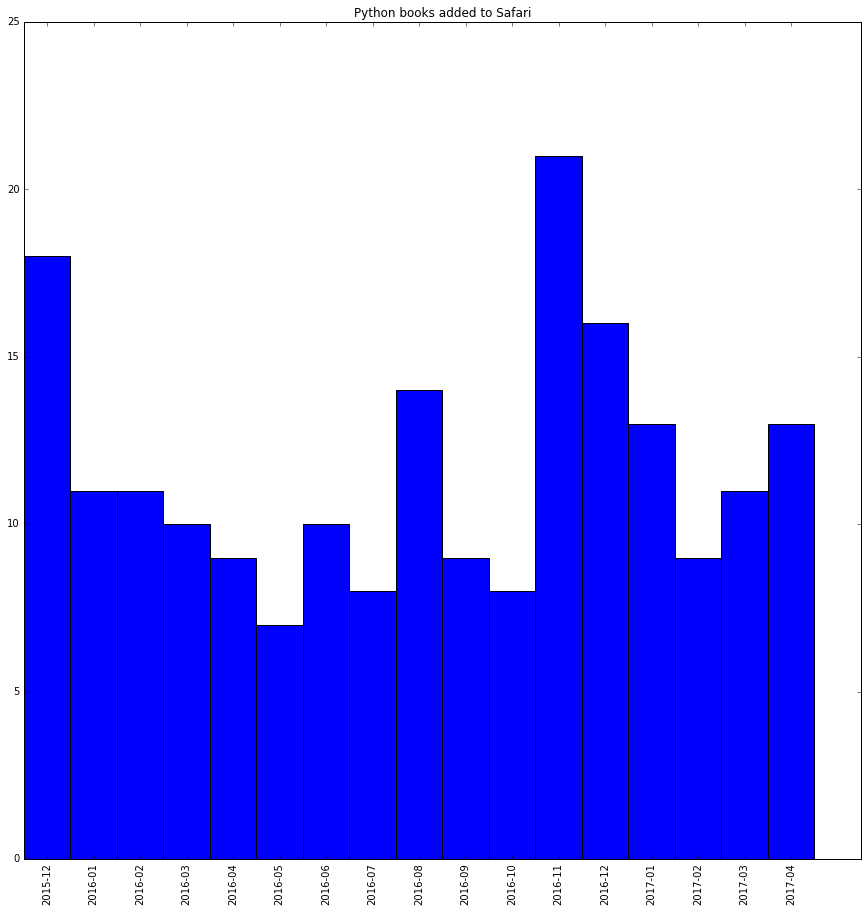

In [3]:
c_sorted = sorted(c.items(), key=operator.itemgetter(0))
labels, values = zip(*c_sorted)
indexes = np.arange(len(labels))
width = 1

#plt.plot(indexes, values)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)

fig = plt.gcf()
fig.set_size_inches(15,15)
    
plt.title('Python books added to Safari')
plt.show() # plt.savefig('file.png') to save to file

In [4]:
assert len(d['2016-06']) == 10
assert len(d['2016-11']) == 21

In [12]:
cover_url = 'https://www.safaribooksonline.com/library/cover/{bookid}/'
html = '<a href="{link}" target="_blank"><img class="book" src="{img}"></a>'
get_id = re.compile(r'.*/(\d+)/\?.*')
get_url = re.compile(r'.*(http\S+).*')

In [13]:
def show_books_for_month(month):
    output = ['''<style>
        img.book {float: left; width: 100px; height: 100px !important; } 
        </style>''']  # ipython hack
    for tweet in d[month]:
        bookid = get_id.sub(r'\1', tweet)
        url = get_url.sub(r'\1', tweet)
        cover = cover_url.format(bookid=bookid)
        output.append(html.format(link=url, img=cover))
    display(HTML('\n'.join(output)))

In [14]:
show_books_for_month('2016-11')

In [15]:
show_books_for_month('2017-04')